In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import streamlit as st


In [4]:
df = pd.read_csv("Mall_Customers.csv")
st.write("Dataset", df.head())

2025-04-24 19:48:23.966 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 19:48:23.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 19:48:23.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 19:48:23.969 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 19:48:23.972 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-24 19:48:23.973 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [6]:
df_processed = df.drop(columns=["CustomerID"])
df_processed["Gender"] = df_processed["Gender"].map({"Male": 0, "Female": 1})
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_processed)

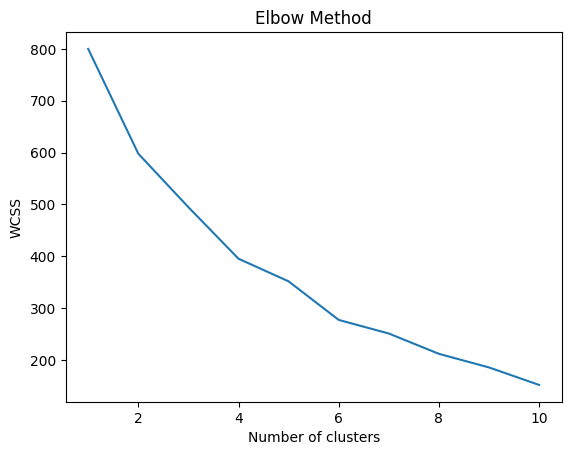

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(scaled_data)
df['Cluster'] = y_kmeans